In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\hongk\AppData\Local\Temp\ipykernel_46508\1028708547.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


In [8]:
print(df.head())

   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         Na

In [9]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
160496,160496,3537089,4429572,28000,28000,28000.0,36 months,8.90,889.09,A,...,NaN,NaN,NaN,NaN,NaN,NaN,49200.0,NaN,NaN,NaN
53969,53969,9208646,11030558,4375,4375,4375.0,36 months,15.10,151.88,C,...,NaN,NaN,NaN,NaN,NaN,NaN,15200.0,NaN,NaN,NaN
397502,397502,15431081,17503411,18400,18400,18400.0,36 months,13.65,625.75,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29700.0,NaN,NaN,NaN
433100,433100,12448332,14460469,25000,25000,24975.0,60 months,15.31,598.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,43000.0,NaN,NaN,NaN
202144,202144,1477365,1735203,6000,6000,6000.0,36 months,14.09,205.33,B,...,NaN,NaN,NaN,NaN,NaN,NaN,35200.0,NaN,NaN,NaN


print("missing values")

In [22]:
print("missing values : ")
missing_value_count = df.isnull().sum()
print(missing_value_count)

missing values : 
Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64


Karena banyak sekali kolom yang memiliki nilai null, maka kita mesti memilih kolom yang relevan saja

In [10]:
# check if there are any columns that has all the values null
column_with_all_null_values = missing_value_count[missing_value_count > 1000].index.tolist()

In [11]:
print(column_with_all_null_values)

['emp_title', 'emp_length', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [12]:
df_cleaned = df.drop(columns=column_with_all_null_values)

In [13]:
df_cleaned

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,0.00,0.00,0.00,Jan-16,432.64,Jan-16,0.0,1,INDIVIDUAL,0.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,0.00,0.00,0.00,Dec-14,17.50,Jan-16,0.0,1,INDIVIDUAL,0.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,0.00,0.00,0.00,Jan-16,514.34,Dec-15,0.0,1,INDIVIDUAL,0.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,0.00,0.00,0.00,Dec-14,1500.68,Apr-15,0.0,1,INDIVIDUAL,0.0


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  home_ownership              466285 non-null  object 
 12  annual_inc                  466281 non-null  float64
 13  verification_s

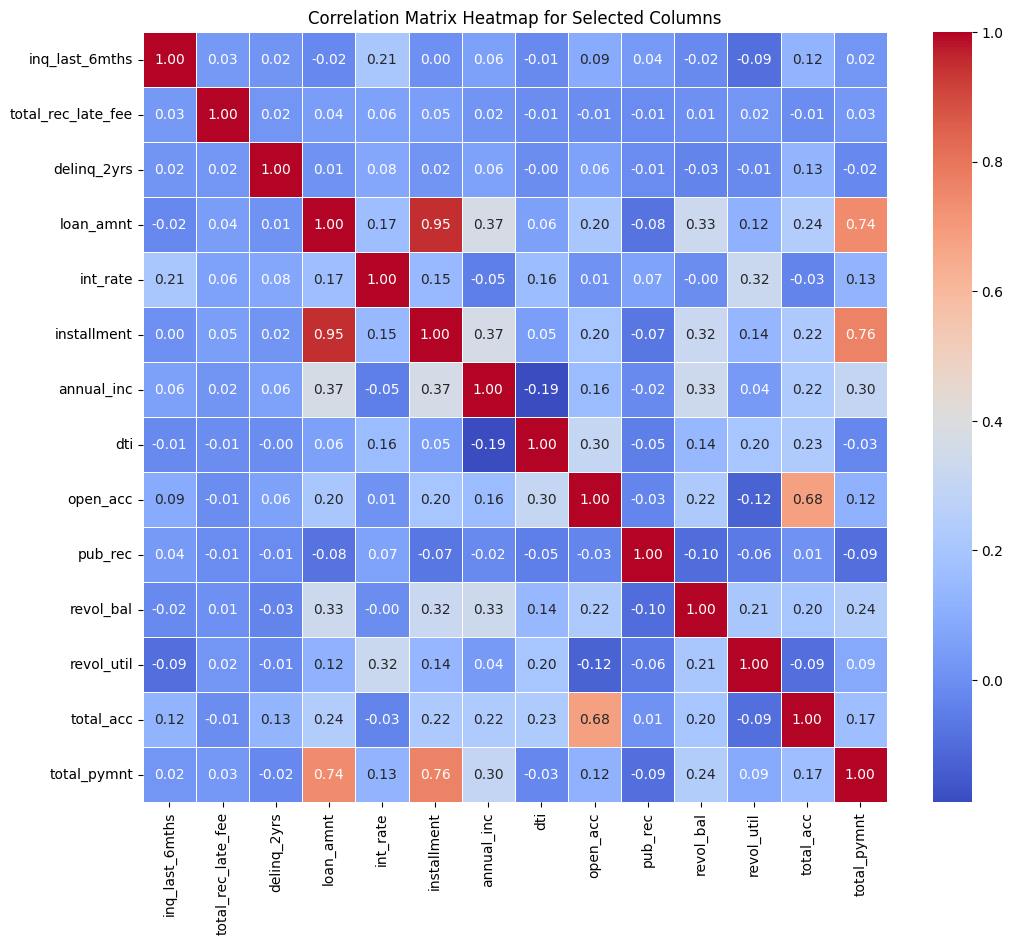

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   inq_last_6mths       466256 non-null  float64
 1   total_rec_late_fee   466285 non-null  float64
 2   delinq_2yrs          466256 non-null  float64
 3   loan_amnt            466285 non-null  int64  
 4   term                 466285 non-null  object 
 5   int_rate             466285 non-null  float64
 6   installment          466285 non-null  float64
 7   grade                466285 non-null  object 
 8   sub_grade            466285 non-null  object 
 9   emp_title            438697 non-null  object 
 10  emp_length           445277 non-null  object 
 11  home_ownership       466285 non-null  object 
 12  annual_inc           466281 non-null  float64
 13  verification_status  466285 non-null  object 
 14  issue_d              466285 non-null  object 
 15  loan_status      

In [15]:
selected_columns = ['inq_last_6mths','total_rec_late_fee','delinq_2yrs','loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
                    'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose',
                    'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                    'initial_list_status', 'application_type', 'total_pymnt','last_pymnt_d','last_credit_pull_d']

df_modified = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_modified.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title("Correlation Matrix Heatmap for Selected Columns")
plt.show()
df_modified.info()

Explaratory Data Analysis

In [47]:
columns_with_less_non_null = [col for col in df_modified.columns if df_modified[col].count() < 466285]
print(columns_with_less_non_null)

['inq_last_6mths', 'delinq_2yrs', 'emp_title', 'emp_length', 'annual_inc', 'title', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', 'last_credit_pull_d']


In [16]:
percent_missing = df_modified.isnull().sum() * 100 / len(df_modified)
dtypes=[df_modified[col].dtype for col in df_modified.columns]
missing_value_df = pd.DataFrame({'tipe data':dtypes,
                                 'null_percent': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(10)

KeyError: 'percent_missing'

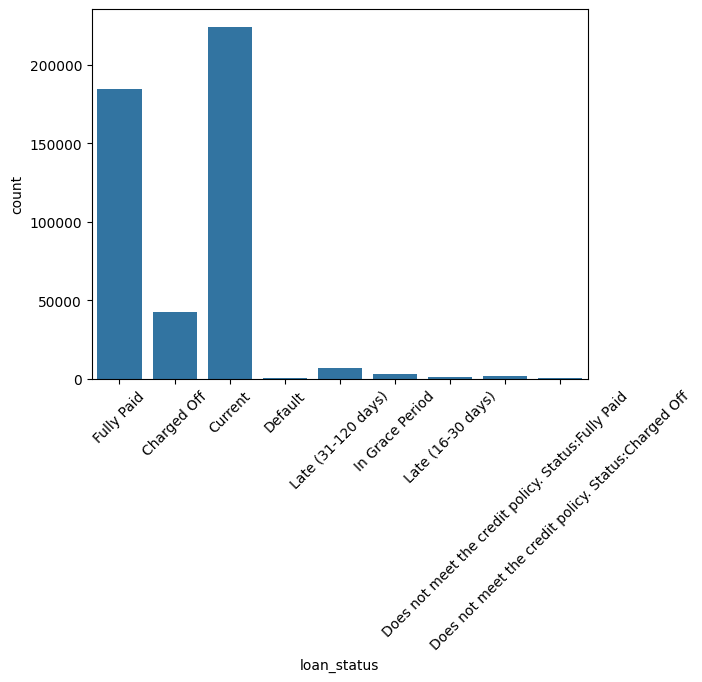

In [48]:
sns.countplot(x='loan_status',data=df_modified)
plt.xticks(rotation=45)
plt.show()

Because the category of the loan_status has too many category, make it into 2 category, the good and bad debt

In [49]:
df_modified.loc[:, 'target'] = np.where(
    (df_modified['loan_status'] == 'Charged Off') | 
    (df_modified['loan_status'] == 'Default') | 
    (df_modified['loan_status'] == 'Late (31-120 days)') | 
    (df_modified['loan_status'] == 'Late (16-30 days)') | 
    (df_modified['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'),
    1, 0
)

C:\Users\hongk\AppData\Local\Temp\ipykernel_27896\308781079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified.loc[:, 'target'] = np.where(


In [50]:
percentages = df_modified['target'].value_counts(normalize=True) * 100
percentages

target
0    88.808132
1    11.191868
Name: proportion, dtype: float64

Tercatat 11.19% nasabah mengalami gagal bayar

In [51]:
object_columns = df_modified.select_dtypes(include=['object'])
object_columns

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,last_pymnt_d,last_credit_pull_d
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,Computer,Jan-85,f,INDIVIDUAL,Jan-15,Jan-16
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,bike,Apr-99,f,INDIVIDUAL,Apr-13,Sep-13
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,real estate business,Nov-01,f,INDIVIDUAL,Jun-14,Jan-16
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,personel,Feb-96,f,INDIVIDUAL,Jan-15,Jan-15
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,other,Personal,Jan-96,f,INDIVIDUAL,Jan-16,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60 months,C,C2,Financial Advisor,4 years,MORTGAGE,Source Verified,Jan-14,Current,debt_consolidation,Debt consolidation,Apr-03,w,INDIVIDUAL,Jan-16,Jan-16
466281,60 months,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,Verified,Jan-14,Charged Off,debt_consolidation,Debt consolidation,Jun-97,f,INDIVIDUAL,Dec-14,Jan-16
466282,60 months,D,D1,patrol,7 years,MORTGAGE,Verified,Jan-14,Current,debt_consolidation,Debt consolidation,Dec-01,f,INDIVIDUAL,Jan-16,Dec-15
466283,36 months,A,A4,Server Engineer Lead,3 years,OWN,Verified,Jan-14,Fully Paid,credit_card,Credit card refinancing,Feb-03,w,INDIVIDUAL,Dec-14,Apr-15


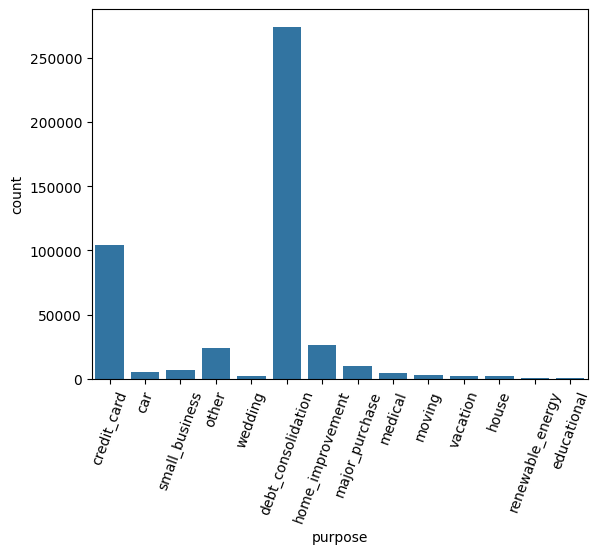

In [52]:
sns.countplot(x='purpose',data=df_modified)
plt.xticks(rotation=70)
plt.show()

In [53]:
unique_values_count = object_columns.nunique()
unique_values_count

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
purpose                    14
title                   63098
earliest_cr_line          664
initial_list_status         2
application_type            1
last_pymnt_d               98
last_credit_pull_d        103
dtype: int64

In [54]:
df_modified = df_modified.drop(columns=['emp_title','title','application_type','loan_status'])

In [55]:
columns_with_less_non_null = [col for col in df_modified.columns if df_modified[col].count() < 466285]
print(columns_with_less_non_null)

['inq_last_6mths', 'delinq_2yrs', 'emp_length', 'annual_inc', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', 'last_credit_pull_d']


In [56]:
object_columns = df_modified.select_dtypes(include=['object'])
unique_values_count = object_columns.nunique()
unique_values_count

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
issue_d                 91
purpose                 14
earliest_cr_line       664
initial_list_status      2
last_pymnt_d            98
last_credit_pull_d     103
dtype: int64

In [57]:
df_modified.groupby('purpose')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
car,5397.0,8122.063183,5541.957455,1000.0,4450.0,6400.0,10000.0,35000.0
credit_card,104157.0,14738.591981,8022.881884,500.0,8800.0,13000.0,20000.0,35000.0
debt_consolidation,274195.0,15129.763307,8160.587034,700.0,9000.0,14000.0,20000.0,35000.0
educational,422.0,6626.540284,5095.382148,500.0,3000.0,5000.0,8500.0,25000.0
home_improvement,26537.0,13911.130685,8821.084668,900.0,7000.0,12000.0,20000.0,35000.0
house,2269.0,14959.960335,8800.214535,1000.0,8000.0,13200.0,20375.0,35000.0
major_purchase,9828.0,10494.243488,7964.835839,1000.0,4800.0,8000.0,15000.0,35000.0
medical,4602.0,8851.222295,6866.840300,500.0,4000.0,6687.5,12000.0,35000.0
moving,2994.0,7550.033400,6225.529040,800.0,3200.0,5500.0,10000.0,35000.0


In [58]:
df_modified.groupby('target')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,414099.0,14278.503389,8272.492476,500.0,8000.0,12000.0,20000.0,35000.0
1,52186.0,14624.953053,8390.633508,500.0,8000.0,12800.0,20000.0,35000.0


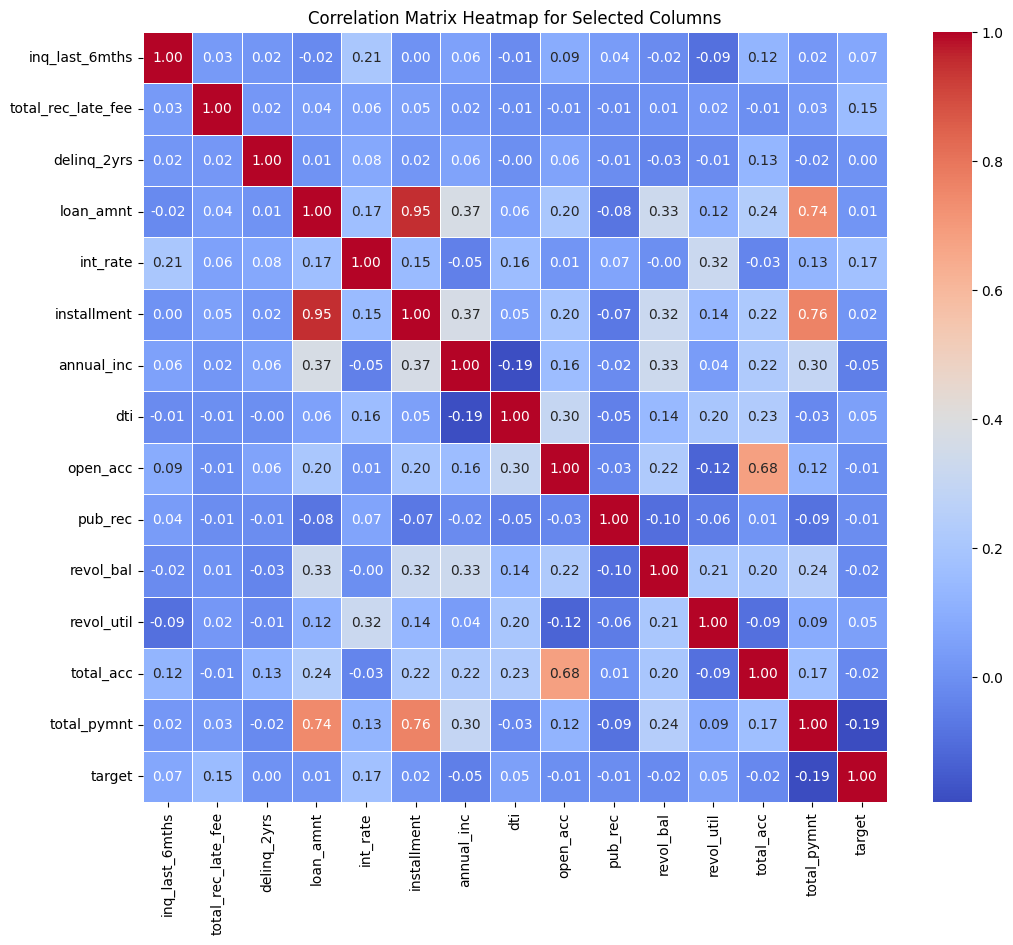

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   inq_last_6mths       466256 non-null  float64
 1   total_rec_late_fee   466285 non-null  float64
 2   delinq_2yrs          466256 non-null  float64
 3   loan_amnt            466285 non-null  int64  
 4   term                 466285 non-null  object 
 5   int_rate             466285 non-null  float64
 6   installment          466285 non-null  float64
 7   grade                466285 non-null  object 
 8   sub_grade            466285 non-null  object 
 9   emp_length           445277 non-null  object 
 10  home_ownership       466285 non-null  object 
 11  annual_inc           466281 non-null  float64
 12  verification_status  466285 non-null  object 
 13  issue_d              466285 non-null  object 
 14  purpose              466285 non-null  object 
 15  dti              

In [59]:
correlation_matrix = df_modified.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title("Correlation Matrix Heatmap for Selected Columns")
plt.show()
df_modified.info()

In [60]:
df_modified.groupby('target')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,414099.0,14278.503389,8272.492476,500.0,8000.0,12000.0,20000.0,35000.0
1,52186.0,14624.953053,8390.633508,500.0,8000.0,12800.0,20000.0,35000.0


<Axes: xlabel='target', ylabel='loan_amnt'>

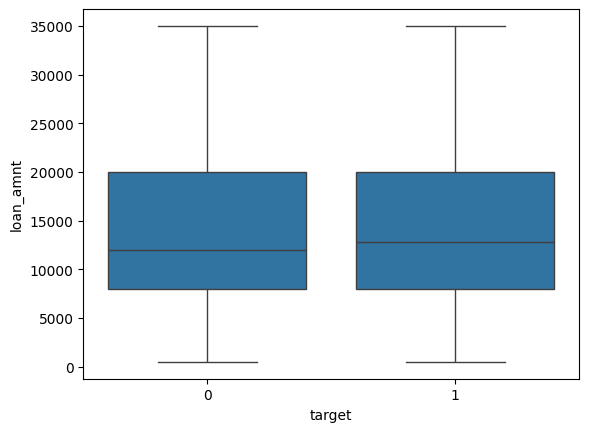

In [61]:
sns.boxplot(x='target', y='loan_amnt', data=df_modified)

<Axes: xlabel='grade', ylabel='count'>

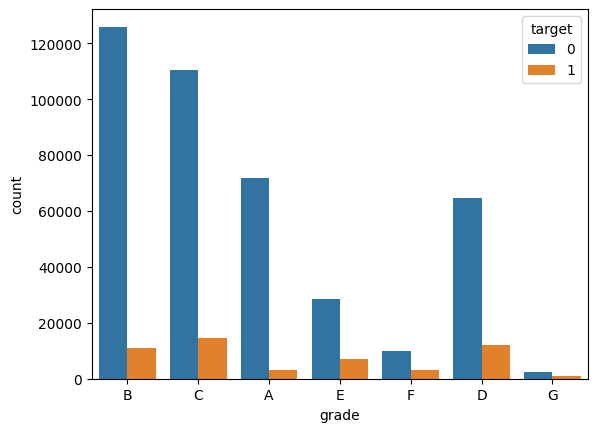

In [62]:
sns.countplot(x='grade', hue='target', data=df_modified)

<Axes: xlabel='sub_grade', ylabel='count'>

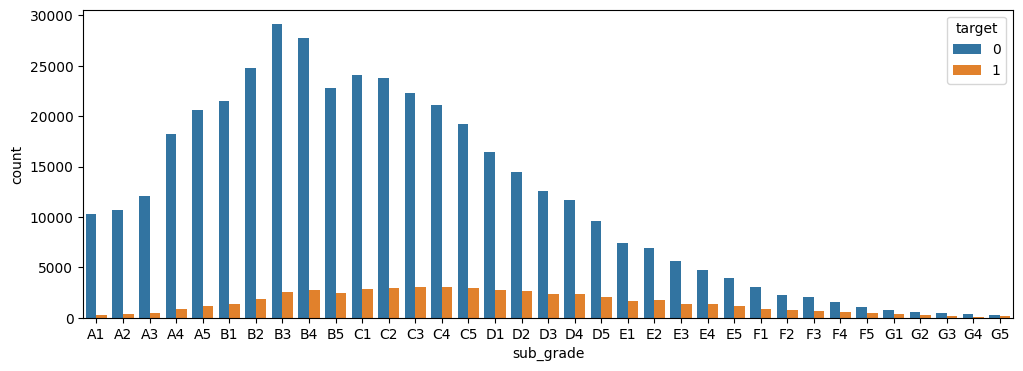

In [63]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df_modified['sub_grade'].unique())
sns.countplot(x= 'sub_grade', data=df_modified, order=subgrade_order,hue='target')

Handle missing values


In [64]:
df_modified.isna().sum()

inq_last_6mths            29
total_rec_late_fee         0
delinq_2yrs               29
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             21008
home_ownership             0
annual_inc                 4
verification_status        0
issue_d                    0
purpose                    0
dti                        0
earliest_cr_line          29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util               340
total_acc                 29
initial_list_status        0
total_pymnt                0
last_pymnt_d             376
last_credit_pull_d        42
target                     0
dtype: int64

In [65]:
percent_missing = df_modified.isnull().sum() * 100 / len(df_modified)
dtypes=[df_modified[col].dtype for col in df_modified.columns]
missing_value_df = pd.DataFrame({'tipe data':dtypes,
                                 'null_percent': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(10)

KeyError: 'percent_missing'

In [ ]:
for col in df_modified.select_dtypes(exclude='object'):
    df_modified[col] = df_modified[col].fillna(df_modified[col].median())
df_modified.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             21008
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
dti                        0
earliest_cr_line          29
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
total_pymnt                0
last_pymnt_d             376
last_credit_pull_d        42
target                     0
dtype: int64

In [ ]:
df_modified['emp_length']

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
466280      4 years
466281    10+ years
466282      7 years
466283      3 years
466284    10+ years
Name: emp_length, Length: 466285, dtype: object

In [66]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

hapus data yang memiliki nilau null  di emp_length

In [67]:
df_modified = df_modified.dropna(subset=['emp_length'])

In [68]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445277 entries, 0 to 466284
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   inq_last_6mths       445248 non-null  float64
 1   total_rec_late_fee   445277 non-null  float64
 2   delinq_2yrs          445248 non-null  float64
 3   loan_amnt            445277 non-null  int64  
 4   term                 445277 non-null  object 
 5   int_rate             445277 non-null  float64
 6   installment          445277 non-null  float64
 7   grade                445277 non-null  object 
 8   sub_grade            445277 non-null  object 
 9   emp_length           445277 non-null  object 
 10  home_ownership       445277 non-null  object 
 11  annual_inc           445273 non-null  float64
 12  verification_status  445277 non-null  object 
 13  issue_d              445277 non-null  object 
 14  purpose              445277 non-null  object 
 15  dti                  4

In [69]:
df_modified.isna().sum()

inq_last_6mths          29
total_rec_late_fee       0
delinq_2yrs             29
loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               4
verification_status      0
issue_d                  0
purpose                  0
dti                      0
earliest_cr_line        29
open_acc                29
pub_rec                 29
revol_bal                0
revol_util             328
total_acc               29
initial_list_status      0
total_pymnt              0
last_pymnt_d           354
last_credit_pull_d      39
target                   0
dtype: int64

In [125]:
df_modified = df_modified.dropna(subset=['earliest_cr_line'])
df_modified = df_modified.dropna(subset=['last_pymnt_d'])
df_modified = df_modified.dropna(subset=['last_credit_pull_d'])
df_modified = df_modified.dropna(subset=['revol_util'])

KeyError: ['earliest_cr_line']

In [126]:
df_modified = df_modified.dropna(subset=['revol_util'])

In [127]:
df_modified.isna().sum()

initial_list_status_f                            0
initial_list_status_w                            0
purpose_Business and Professional Development    0
purpose_Credit Card                              0
purpose_Debt Consolidation                       0
purpose_Lifestyle and Discretionary Spending     0
purpose_Other                                    0
purpose_Personal and Household Needs             0
home_ownership_MORTGAGE                          0
home_ownership_OTHER                             0
home_ownership_OWN                               0
home_ownership_RENT                              0
home_ownership_MORTGAGE                          0
home_ownership_OTHER                             0
home_ownership_OWN                               0
home_ownership_RENT                              0
inq_last_6mths                                   0
total_rec_late_fee                               0
delinq_2yrs                                      0
loan_amnt                      

In [128]:
object_columns = df_modified.select_dtypes(include=['object'])
object_columns

""
0
1
2
3
4
...
444851
444852
444853
444854


Atur string tanggal menjadi kolom numerik

In [73]:
df_modified[['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 444856 entries, 0 to 466284
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   issue_d             444856 non-null  object
 1   last_pymnt_d        444856 non-null  object
 2   last_credit_pull_d  444856 non-null  object
 3   earliest_cr_line    444856 non-null  object
dtypes: object(4)
memory usage: 17.0+ MB


In [74]:
from datetime import datetime as dt

In [75]:
# df_modified['issue_d'] = pd.to_datetime(df_modified['issue_d'].apply(lambda x : dt.strptime(x, '%b-%y')))
df_modified['last_pymnt_d'] = pd.to_datetime(df_modified['last_pymnt_d'],format='%b-%y')
df_modified['earliest_cr_line'] =pd.to_datetime(df_modified['earliest_cr_line'],format='%b-%y') 
df_modified['last_credit_pull_d'] = pd.to_datetime(df_modified['last_credit_pull_d'],format='%b-%y') 

In [76]:
df_modified[['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']].head()

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,Dec-11,2015-01-01,2016-01-01,1985-01-01
1,Dec-11,2013-04-01,2013-09-01,1999-04-01
2,Dec-11,2014-06-01,2016-01-01,2001-11-01
3,Dec-11,2015-01-01,2015-01-01,1996-02-01
4,Dec-11,2016-01-01,2016-01-01,1996-01-01


In [77]:
df_modified[['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 444856 entries, 0 to 466284
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   issue_d             444856 non-null  object        
 1   last_pymnt_d        444856 non-null  datetime64[ns]
 2   last_credit_pull_d  444856 non-null  datetime64[ns]
 3   earliest_cr_line    444856 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(1)
memory usage: 17.0+ MB


Create new feature

In [78]:
df_modified['start_to_last_year'] = df_modified['last_credit_pull_d'].dt.year - df_modified['earliest_cr_line'].dt.year


In [79]:
df_modified['start_to_last_month'] = (df_modified['last_credit_pull_d'].dt.year - df_modified['earliest_cr_line'].dt.year)*12 + df_modified['last_credit_pull_d'].dt.month - df_modified['earliest_cr_line'].dt.month

In [80]:
df_modified['start_to_last_year'].head(10)


0    31
1    14
2    15
3    19
4    20
5    11
6    11
7     7
8     8
9     9
Name: start_to_last_year, dtype: int32

In [81]:
df_modified['start_to_last_month'].head(10)

0    372
1    173
2    170
3    227
4    240
5    130
6    126
7     95
8    100
9    102
Name: start_to_last_month, dtype: int32

In [82]:
df_modified.drop(columns='last_credit_pull_d',inplace=True)
df_modified.drop(columns='earliest_cr_line',inplace=True)

In [83]:
n = len(pd.unique(df_modified['emp_length']))
n

11

In [84]:
df_modified['emp_length'].head(10)

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
5      3 years
6      8 years
7      9 years
8      4 years
9     < 1 year
Name: emp_length, dtype: object

In [85]:
emp_length_dict = {'< 1 year':0,
               '1 year':1,
               '2 years':2,
               '3 years':3,
               '4 years':4,
               '5 years':5,
               '6 years':6,
               '7 years':7,
               '8 years':8, 
               '9 years':9,
               '10+ years':10}
df_modified['emp_length'] = df_modified['emp_length'].map(emp_length_dict)

In [86]:
df_modified['emp_length'].head(10)

0    10
1     0
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     0
Name: emp_length, dtype: int64

Gunakan feature grade karena jenis jumlah nilai uniknya sedikit, tidak sebanyak sub-grade

In [87]:
grade_dict = {
    'A':0,
    'B':1,
    'C':2,
    'D':3,
    'E':4,
    'F':5,
    'G':6
}
df_modified['grade'] = df_modified['grade'].map(grade_dict)

In [88]:
df_modified['grade'].head(10)

0    1
1    2
2    2
3    2
4    1
5    0
6    2
7    4
8    5
9    1
Name: grade, dtype: int64

In [89]:
df_modified.drop(columns='sub_grade',inplace=True)

In [90]:
df_modified["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [91]:
home_ownership_dict = {
    'RENT': 'RENT',
    'MORTGAGE' :'MORTGAGE',
    'OWN' : 'OWN',
    'OTHER' :'OTHER',
    'NONE':'OTHER',
    'ANY':'OTHER'
}
df_modified['home_ownership'] = df_modified['home_ownership'].map(home_ownership_dict)

In [92]:
encoder = OneHotEncoder(sparse=False)
df_home_encoded = pd.DataFrame(encoder.fit_transform(df_modified[["home_ownership"]]))
df_home_encoded.columns = encoder.get_feature_names_out(["home_ownership"])

c:\Users\hongk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [93]:
df_modified = df_modified.reset_index(drop=True)

In [94]:
df_modified["home_ownership"]

0             RENT
1             RENT
2             RENT
3             RENT
4             RENT
            ...   
444851    MORTGAGE
444852    MORTGAGE
444853    MORTGAGE
444854         OWN
444855    MORTGAGE
Name: home_ownership, Length: 444856, dtype: object

In [95]:
df_home_encoded.head

<bound method NDFrame.head of         home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                           0.0                   0.0                 0.0   
1                           0.0                   0.0                 0.0   
2                           0.0                   0.0                 0.0   
3                           0.0                   0.0                 0.0   
4                           0.0                   0.0                 0.0   
...                         ...                   ...                 ...   
444851                      1.0                   0.0                 0.0   
444852                      1.0                   0.0                 0.0   
444853                      1.0                   0.0                 0.0   
444854                      0.0                   0.0                 1.0   
444855                      1.0                   0.0                 0.0   

        home_ownership_RENT  
0              

In [96]:
df_modified

,inq_last_6mths,total_rec_late_fee,delinq_2yrs,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,last_pymnt_d,target,start_to_last_year,start_to_last_month
0,1.0,0.00,0.0,5000,36 months,10.65,162.87,1,10,RENT,...,0.0,13648,83.7,9.0,f,5861.071414,2015-01-01,0,31,372
1,5.0,0.00,0.0,2500,60 months,15.27,59.83,2,0,RENT,...,0.0,1687,9.4,4.0,f,1008.710000,2013-04-01,1,14,173
2,2.0,0.00,0.0,2400,36 months,15.96,84.33,2,10,RENT,...,0.0,2956,98.5,10.0,f,3003.653644,2014-06-01,0,15,170
3,1.0,16.97,0.0,10000,36 months,13.49,339.31,2,10,RENT,...,0.0,5598,21.0,37.0,f,12226.302210,2015-01-01,0,19,227
4,0.0,0.00,0.0,3000,60 months,12.69,67.79,1,1,RENT,...,0.0,27783,53.9,38.0,f,3242.170000,2016-01-01,0,20,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444851,2.0,0.00,0.0,18400,60 months,14.47,432.64,2,4,MORTGAGE,...,0.0,23208,77.6,36.0,w,10383.360000,2016-01-01,0,13,153
444852,5.0,0.00,0.0,22000,60 months,19.97,582.50,3,10,MORTGAGE,...,1.0,18238,46.3,30.0,f,4677.920000,2014-12-01,1,19,223
444853,2.0,0.00,0.0,20700,60 months,16.99,514.34,3,7,MORTGAGE,...,0.0,6688,51.1,43.0,f,12343.980000,2016-01-01,0,14,168
444854,1.0,0.00,3.0,2000,36 months,7.90,62.59,0,3,OWN,...,0.0,11404,21.5,27.0,w,2126.579838,2014-12-01,0,12,146


In [97]:
df_modified= pd.concat([df_home_encoded, df_modified],axis=1)
df_modified

,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,inq_last_6mths,total_rec_late_fee,delinq_2yrs,loan_amnt,term,int_rate,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,last_pymnt_d,target,start_to_last_year,start_to_last_month
0,0.0,0.0,0.0,1.0,1.0,0.00,0.0,5000,36 months,10.65,...,0.0,13648,83.7,9.0,f,5861.071414,2015-01-01,0,31,372
1,0.0,0.0,0.0,1.0,5.0,0.00,0.0,2500,60 months,15.27,...,0.0,1687,9.4,4.0,f,1008.710000,2013-04-01,1,14,173
2,0.0,0.0,0.0,1.0,2.0,0.00,0.0,2400,36 months,15.96,...,0.0,2956,98.5,10.0,f,3003.653644,2014-06-01,0,15,170
3,0.0,0.0,0.0,1.0,1.0,16.97,0.0,10000,36 months,13.49,...,0.0,5598,21.0,37.0,f,12226.302210,2015-01-01,0,19,227
4,0.0,0.0,0.0,1.0,0.0,0.00,0.0,3000,60 months,12.69,...,0.0,27783,53.9,38.0,f,3242.170000,2016-01-01,0,20,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444851,1.0,0.0,0.0,0.0,2.0,0.00,0.0,18400,60 months,14.47,...,0.0,23208,77.6,36.0,w,10383.360000,2016-01-01,0,13,153
444852,1.0,0.0,0.0,0.0,5.0,0.00,0.0,22000,60 months,19.97,...,1.0,18238,46.3,30.0,f,4677.920000,2014-12-01,1,19,223
444853,1.0,0.0,0.0,0.0,2.0,0.00,0.0,20700,60 months,16.99,...,0.0,6688,51.1,43.0,f,12343.980000,2016-01-01,0,14,168
444854,0.0,0.0,1.0,0.0,1.0,0.00,3.0,2000,36 months,7.90,...,0.0,11404,21.5,27.0,w,2126.579838,2014-12-01,0,12,146


In [98]:
df_modified = df_modified.drop(columns=['home_ownership'])

In [99]:
df_modified['term'] = df_modified['term'].str.extract('(\d+)').astype(int)

In [100]:
df_modified

,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,inq_last_6mths,total_rec_late_fee,delinq_2yrs,loan_amnt,term,int_rate,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,last_pymnt_d,target,start_to_last_year,start_to_last_month
0,0.0,0.0,0.0,1.0,1.0,0.00,0.0,5000,36,10.65,...,0.0,13648,83.7,9.0,f,5861.071414,2015-01-01,0,31,372
1,0.0,0.0,0.0,1.0,5.0,0.00,0.0,2500,60,15.27,...,0.0,1687,9.4,4.0,f,1008.710000,2013-04-01,1,14,173
2,0.0,0.0,0.0,1.0,2.0,0.00,0.0,2400,36,15.96,...,0.0,2956,98.5,10.0,f,3003.653644,2014-06-01,0,15,170
3,0.0,0.0,0.0,1.0,1.0,16.97,0.0,10000,36,13.49,...,0.0,5598,21.0,37.0,f,12226.302210,2015-01-01,0,19,227
4,0.0,0.0,0.0,1.0,0.0,0.00,0.0,3000,60,12.69,...,0.0,27783,53.9,38.0,f,3242.170000,2016-01-01,0,20,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444851,1.0,0.0,0.0,0.0,2.0,0.00,0.0,18400,60,14.47,...,0.0,23208,77.6,36.0,w,10383.360000,2016-01-01,0,13,153
444852,1.0,0.0,0.0,0.0,5.0,0.00,0.0,22000,60,19.97,...,1.0,18238,46.3,30.0,f,4677.920000,2014-12-01,1,19,223
444853,1.0,0.0,0.0,0.0,2.0,0.00,0.0,20700,60,16.99,...,0.0,6688,51.1,43.0,f,12343.980000,2016-01-01,0,14,168
444854,0.0,0.0,1.0,0.0,1.0,0.00,3.0,2000,36,7.90,...,0.0,11404,21.5,27.0,w,2126.579838,2014-12-01,0,12,146


In [101]:
df_modified["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [102]:
encoder = OneHotEncoder(sparse=False)
df_verif_encoded = pd.DataFrame(encoder.fit_transform(df_modified[["verification_status"]]))
df_verif_encoded.columns = encoder.get_feature_names_out(["verification_status"])

c:\Users\hongk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [103]:
df_modified= pd.concat([df_home_encoded, df_modified],axis=1)
df_modified

,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,inq_last_6mths,total_rec_late_fee,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,last_pymnt_d,target,start_to_last_year,start_to_last_month
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.00,...,0.0,13648,83.7,9.0,f,5861.071414,2015-01-01,0,31,372
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,0.00,...,0.0,1687,9.4,4.0,f,1008.710000,2013-04-01,1,14,173
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.00,...,0.0,2956,98.5,10.0,f,3003.653644,2014-06-01,0,15,170
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,16.97,...,0.0,5598,21.0,37.0,f,12226.302210,2015-01-01,0,19,227
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,...,0.0,27783,53.9,38.0,f,3242.170000,2016-01-01,0,20,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444851,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.00,...,0.0,23208,77.6,36.0,w,10383.360000,2016-01-01,0,13,153
444852,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.00,...,1.0,18238,46.3,30.0,f,4677.920000,2014-12-01,1,19,223
444853,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.00,...,0.0,6688,51.1,43.0,f,12343.980000,2016-01-01,0,14,168
444854,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.00,...,0.0,11404,21.5,27.0,w,2126.579838,2014-12-01,0,12,146


In [104]:
df_modified.drop(["verification_status"] ,axis=1, inplace=True)
df_modified.drop(["issue_d"] ,axis=1, inplace=True)

In [105]:
df_modified["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

The purpose category is too much, categorize to fewer categories

In [106]:
purpose_dict = {
    'credit_card': 'Credit Card',
    'debt_consolidation': 'Debt Consolidation',
    'car': 'Lifestyle and Discretionary Spending',
    'small_business': 'Business and Professional Development',
    'educational': 'Business and Professional Development',
    'home_improvement': 'Personal and Household Needs',
    'house': 'Personal and Household Needs',
    'major_purchase': 'Lifestyle and Discretionary Spending',
    'medical': 'Personal and Household Needs',
    'moving': 'Lifestyle and Discretionary Spending',
    'vacation': 'Lifestyle and Discretionary Spending',
    'wedding': 'Lifestyle and Discretionary Spending',
    'renewable_energy': 'Personal and Household Needs',
    'other': 'Other'
}

df_modified['purpose'] = df_modified['purpose'].map(purpose_dict)

In [107]:
encoder = OneHotEncoder(sparse=False)
df_purpose_encoded = pd.DataFrame(encoder.fit_transform(df_modified[["purpose"]]))
df_purpose_encoded.columns = encoder.get_feature_names_out(["purpose"])
df_modified.drop(["purpose"] ,axis=1, inplace=True)
df_modified= pd.concat([df_purpose_encoded, df_modified],axis=1)
df_modified

c:\Users\hongk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,purpose_Business and Professional Development,purpose_Credit Card,purpose_Debt Consolidation,purpose_Lifestyle and Discretionary Spending,purpose_Other,purpose_Personal and Household Needs,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,last_pymnt_d,target,start_to_last_year,start_to_last_month
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,13648,83.7,9.0,f,5861.071414,2015-01-01,0,31,372
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1687,9.4,4.0,f,1008.710000,2013-04-01,1,14,173
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2956,98.5,10.0,f,3003.653644,2014-06-01,0,15,170
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5598,21.0,37.0,f,12226.302210,2015-01-01,0,19,227
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,27783,53.9,38.0,f,3242.170000,2016-01-01,0,20,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444851,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,23208,77.6,36.0,w,10383.360000,2016-01-01,0,13,153
444852,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,18238,46.3,30.0,f,4677.920000,2014-12-01,1,19,223
444853,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,6688,51.1,43.0,f,12343.980000,2016-01-01,0,14,168
444854,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,11404,21.5,27.0,w,2126.579838,2014-12-01,0,12,146


In [108]:
encoder = OneHotEncoder(sparse=False)
df_status_encoded = pd.DataFrame(encoder.fit_transform(df_modified[["initial_list_status"]]))
df_status_encoded.columns = encoder.get_feature_names_out(["initial_list_status"])
df_modified.drop(["initial_list_status"] ,axis=1, inplace=True)
df_modified= pd.concat([df_status_encoded, df_modified],axis=1)


c:\Users\hongk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [109]:
df_modified

,initial_list_status_f,initial_list_status_w,purpose_Business and Professional Development,purpose_Credit Card,purpose_Debt Consolidation,purpose_Lifestyle and Discretionary Spending,purpose_Other,purpose_Personal and Household Needs,home_ownership_MORTGAGE,home_ownership_OTHER,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_d,target,start_to_last_year,start_to_last_month
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,13648,83.7,9.0,5861.071414,2015-01-01,0,31,372
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1687,9.4,4.0,1008.710000,2013-04-01,1,14,173
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2956,98.5,10.0,3003.653644,2014-06-01,0,15,170
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,10.0,0.0,5598,21.0,37.0,12226.302210,2015-01-01,0,19,227
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,15.0,0.0,27783,53.9,38.0,3242.170000,2016-01-01,0,20,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444851,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,18.0,0.0,23208,77.6,36.0,10383.360000,2016-01-01,0,13,153
444852,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,18.0,1.0,18238,46.3,30.0,4677.920000,2014-12-01,1,19,223
444853,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,18.0,0.0,6688,51.1,43.0,12343.980000,2016-01-01,0,14,168
444854,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,0.0,11404,21.5,27.0,2126.579838,2014-12-01,0,12,146


In [110]:
df_modified = df_modified.drop(columns=['last_pymnt_d'])

In [111]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444856 entries, 0 to 444855
Data columns (total 36 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   initial_list_status_f                          444856 non-null  float64
 1   initial_list_status_w                          444856 non-null  float64
 2   purpose_Business and Professional Development  444856 non-null  float64
 3   purpose_Credit Card                            444856 non-null  float64
 4   purpose_Debt Consolidation                     444856 non-null  float64
 5   purpose_Lifestyle and Discretionary Spending   444856 non-null  float64
 6   purpose_Other                                  444856 non-null  float64
 7   purpose_Personal and Household Needs           444856 non-null  float64
 8   home_ownership_MORTGAGE                        444856 non-null  float64
 9   home_ownership_OTHER                 

In [112]:
nan_df = df_modified.isna().sum()

In [113]:
print(nan_df)

initial_list_status_f                              0
initial_list_status_w                              0
purpose_Business and Professional Development      0
purpose_Credit Card                                0
purpose_Debt Consolidation                         0
purpose_Lifestyle and Discretionary Spending       0
purpose_Other                                      0
purpose_Personal and Household Needs               0
home_ownership_MORTGAGE                            0
home_ownership_OTHER                               0
home_ownership_OWN                                 0
home_ownership_RENT                                0
home_ownership_MORTGAGE                            0
home_ownership_OTHER                               0
home_ownership_OWN                                 0
home_ownership_RENT                                0
inq_last_6mths                                     0
total_rec_late_fee                                 0
delinq_2yrs                                   

In [114]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444856 entries, 0 to 444855
Data columns (total 36 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   initial_list_status_f                          444856 non-null  float64
 1   initial_list_status_w                          444856 non-null  float64
 2   purpose_Business and Professional Development  444856 non-null  float64
 3   purpose_Credit Card                            444856 non-null  float64
 4   purpose_Debt Consolidation                     444856 non-null  float64
 5   purpose_Lifestyle and Discretionary Spending   444856 non-null  float64
 6   purpose_Other                                  444856 non-null  float64
 7   purpose_Personal and Household Needs           444856 non-null  float64
 8   home_ownership_MORTGAGE                        444856 non-null  float64
 9   home_ownership_OTHER                 

In [115]:
nan_df

initial_list_status_f                              0
initial_list_status_w                              0
purpose_Business and Professional Development      0
purpose_Credit Card                                0
purpose_Debt Consolidation                         0
purpose_Lifestyle and Discretionary Spending       0
purpose_Other                                      0
purpose_Personal and Household Needs               0
home_ownership_MORTGAGE                            0
home_ownership_OTHER                               0
home_ownership_OWN                                 0
home_ownership_RENT                                0
home_ownership_MORTGAGE                            0
home_ownership_OTHER                               0
home_ownership_OWN                                 0
home_ownership_RENT                                0
inq_last_6mths                                     0
total_rec_late_fee                                 0
delinq_2yrs                                   

Dari Exploratory data, dapat dilihat nasabah yang memiliki bad loan sebesar 11%, ini dapat dikatakan data mengalami imbalance karena terlalu sedikit data yang menyatakan nasabah mengalami gagal bayar 

In [131]:
X = df_modified.drop('target', axis=1).values
y = df_modified['target'].values    

In [132]:
value_counts = df_modified['target'].value_counts()

print("Counts of each unique value in 'target':")
print(value_counts)

Counts of each unique value in 'target':
target
0    395641
1     48922
Name: count, dtype: int64


In [133]:
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.86107141e+03
  3.10000000e+01 3.72000000e+02]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00871000e+03
  1.40000000e+01 1.73000000e+02]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 3.00365364e+03
  1.50000000e+01 1.70000000e+02]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.23439800e+04
  1.40000000e+01 1.68000000e+02]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 2.12657984e+03
  1.20000000e+01 1.46000000e+02]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.82162000e+03
  1.60000000e+01 1.91000000e+02]]


In [134]:
print(y)

[0 1 0 ... 0 0 0]


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [143]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [145]:
#Function Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model,  y_train_pred, y_test_pred, y_train, y_test):
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_train_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_test_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_train_pred, zero_division=0))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_test_pred, zero_division=0))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_train_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_test_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_train_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_test_pred))
    
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def cfm(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale = 1.5)
    ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
    plt.title('Confusion Matrix From Test Set',fontsize=18)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

In [146]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [147]:
eval_classification(rf, y_train_pred, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.94
Recall (Train Set): 1.00
Recall (Test Set): 0.36
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.52
AUC (Train Set): 1.00
AUC (Test Set): 0.68


In [148]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print("TP",TP)
print("TN",TN)
print("FP",FP)
print("FN",FN)

TP 3527
TN 78901
FP 245
FN 6240


In [117]:
# rf_classifier = RandomForestClassifier(random_state=101)
# rf_classifier.fit(X_train, y_train)

In [118]:
# rf_predictions = rf_classifier.predict(X_test)

In [149]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.9270635340163981
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     79146
           1       0.94      0.36      0.52      9767

    accuracy                           0.93     88913
   macro avg       0.93      0.68      0.74     88913
weighted avg       0.93      0.93      0.91     88913



In [150]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

eval_classification(dt, y_train_pred, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.91
Precision (Train Set): 1.00
Precision (Test Set): 0.60
Recall (Train Set): 1.00
Recall (Test Set): 0.62
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.61
AUC (Train Set): 1.00
AUC (Test Set): 0.78


In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [167]:
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense (units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [168]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.3191 - val_loss: 0.2383
Epoch 2/25
1390/1390 [==============================] - 2s 2ms/step - loss: 0.2456 - val_loss: 0.2148
Epoch 3/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.2276 - val_loss: 0.2068
Epoch 4/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.2200 - val_loss: 0.1979
Epoch 5/25
1390/1390 [==============================] - 4s 3ms/step - loss: 0.2161 - val_loss: 0.1969
Epoch 6/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.2132 - val_loss: 0.1935
Epoch 7/25
1390/1390 [==============================] - 3s 3ms/step - loss: 0.2107 - val_loss: 0.1949
Epoch 8/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.2093 - val_loss: 0.1952
Epoch 9/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.2057 - val_loss: 0.1904
Epoch 10/25
1390/1390 [==============================] - 3s 3ms/step - loss: 0.204

<Axes: >

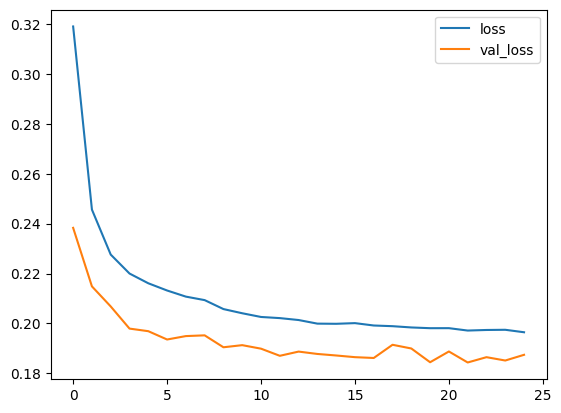

In [169]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [170]:
predictions = (model.predict(X_test) > 0.5).astype('int64')

2779/2779 [==============================] - 2s 712us/step


In [171]:
from sklearn.metrics import classification_report, confusion_matrix

In [174]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.8364468637881974
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     79146
           1       0.89      0.47      0.62      9767

    accuracy                           0.94     88913
   macro avg       0.91      0.73      0.79     88913
weighted avg       0.93      0.94      0.93     88913



In [172]:
print(confusion_matrix(y_test, predictions))

[[78564   582]
 [ 5130  4637]]


In [ ]:
eval_classification(model, y_train_pred, y_pred, y_train, y_test)

The recall low on test set, this might be the consequence of imbalance dataset

In [151]:
a = pd.Series(y_train).value_counts().reset_index()
a.columns=['target','total']
a['%'] = round(a['total']*100/sum(a['total']),3)
a

,target,total,%
0,0,316495,88.991
1,1,39155,11.009


In [152]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Correct usage with keyword argument for sampling strategy
X_under, y_under = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X_train, y_train)
X_over, y_over = RandomOverSampler(sampling_strategy=0.7).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = SMOTE(sampling_strategy=0.5).fit_resample(X_train, y_train)


In [153]:
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('---'*10, '\n')

OVERSAMPLING
0    316495
1    221546
Name: count, dtype: int64
------------------------------ 



In [154]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_over,y_over)

y_train_pred_over = dt.predict(X_over)
y_pred_over = dt.predict(X_test)

eval_classification(dt, y_train_pred_over, y_pred_over, y_over, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.91
Precision (Train Set): 1.00
Precision (Test Set): 0.59
Recall (Train Set): 1.00
Recall (Test Set): 0.60
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.60
AUC (Train Set): 1.00
AUC (Test Set): 0.78


In [155]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print("TP",TP)
print("TN",TN)
print("FP",FP)
print("FN",FN)

TP 6026
TN 75205
FP 3941
FN 3741


In [161]:
best_features = ['recoveries',
 'collection_recovery_fee',
 'total_rec_prncp',
 'out_prncp_inv',
 'out_prncp',
 'last_pymnt_amnt',
 'total_pymnt',
 'total_pymnt_inv',
 'installment',
 'funded_amnt_inv']

In [162]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_under[best_features],y_under)

y_train_pred = dt.predict(X_under)
y_pred = dt.predict(X_test)

eval_classification(dt, y_train_pred, y_pred, y_under, y_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [163]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_under,y_under)

y_train_pred = dt.predict(X_under)
y_pred = dt.predict(X_test)

eval_classification(dt, y_train_pred, y_pred, y_under, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.84
Precision (Train Set): 1.00
Precision (Test Set): 0.37
Recall (Train Set): 1.00
Recall (Test Set): 0.71
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.49
AUC (Train Set): 1.00
AUC (Test Set): 0.78


In [164]:
eval_classification(dt, y_train_pred, y_pred, y_under, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.84
Precision (Train Set): 1.00
Precision (Test Set): 0.37
Recall (Train Set): 1.00
Recall (Test Set): 0.71
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.49
AUC (Train Set): 1.00
AUC (Test Set): 0.78
